# Importing libraries 

for dataset, image processing, scikit machine learning libraries

In [1]:
#Code help taken from: https://www.back-prop.com/deep_learning/knn/mnist/2019/05/16/knn_classifier/
import mnist #Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graph
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.datasets import load_digits
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Seperating training, testing and validation data
* training data is used to train model.
* testing data is used for testing model function,
* Validation data is used to tune up hyperparameters.

In [2]:
train_images = mnist.train_images() #training data images
train_labels = mnist.train_labels() #training data labels
test_images = mnist.test_images() #testing data images
test_labels = mnist.test_labels() #testing data labels

#validation dataset
train_images,val_images,train_labels,val_labels = train_test_split(train_images,
                                                                   train_labels,
                                                                   test_size=0.1,#10% validation data
                                                                   random_state=84)
print("training data points: {}".format(len(train_labels)))
print("validation data points: {}".format(len(val_labels)))
print("testing data points: {}".format(len(test_labels)))

training data points: 54000
validation data points: 6000
testing data points: 10000


# Normalization of data
Normalizing pixels from the range (0, 255) to (0, 1) to train our network easily.
# Flattening of images
Flatten the image from 28 x 28 to 1-d array of size 784 to pass it to the neural network.

In [3]:

train_images = train_images / 255
test_images = test_images / 255
val_images = val_images / 255


train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
val_images = val_images.reshape((-1, 784))


print(test_images.shape) 
print(train_images.shape)
print(val_images.shape) 

(10000, 784)
(54000, 784)
(6000, 784)


# Tuning of hyperparameter
kNN is an unsupervised machine learning algorithm. It has a hyperparameter k, which specifies the number of nearest neighbours in classification. Here, k hyperparameter is tuned by training model on training data and checking accuracies on validation dataset.

In [4]:
kVals = np.arange(1,30,2)

for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_images,train_labels)
    
    # evaluate the model and update the accuracies list
    score = model.score(val_images, val_labels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=97.48%
k=3, accuracy=97.62%
k=5, accuracy=97.28%
k=7, accuracy=97.10%
k=9, accuracy=97.03%
k=11, accuracy=97.03%
k=13, accuracy=96.77%
k=15, accuracy=96.60%
k=17, accuracy=96.43%
k=19, accuracy=96.20%
k=21, accuracy=96.08%
k=23, accuracy=95.90%
k=25, accuracy=95.92%
k=27, accuracy=95.80%
k=29, accuracy=95.75%


# Training and testing
kNN classifier is trained on value of k = 3 which came out to be best value due to its accuracy on validation data. 

In [5]:
#For best value of accuracy, k turned out to be 3
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_images, train_labels)
predictions = model.predict(test_images)

print(classification_report(test_labels, predictions))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.99      0.99      0.99       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Predict labels of sample test images

In [6]:
#predict on the first five test images
predictions = model.predict(test_images[:6])
print('labels: ' , test_labels[:6])
print('predictions by our model: ' , predictions)

labels:  [7 2 1 0 4 1]
predictions by our model:  [7 2 1 0 4 1]


# Confusion matrix
Confusion matrix shows relationship between actual labels and labels predicted by the model.

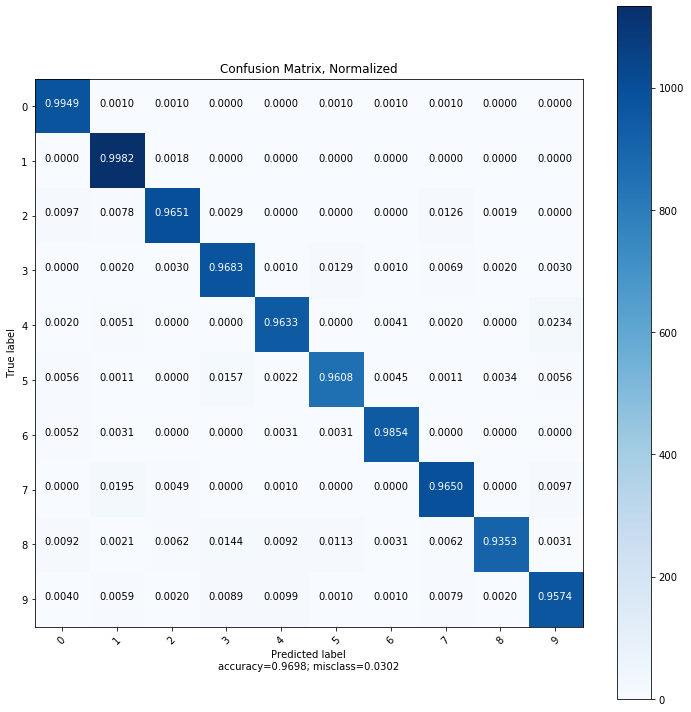

In [7]:
#ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

predictions = model.predict(test_images)
plot_confusion_matrix(confusion_matrix(test_labels, predictions), 
                      normalize    = True,
                      target_names = ['0', '1', '2',  '3',  '4', '5',  '6', '7',  '8', '9'],
                      title        = "Confusion Matrix, Normalized")



In [8]:
sub = pd.DataFrame(predictions)
sub.index.name = 'ImageId'
sub.index += 1
sub.columns = ['Label']
sub.to_csv('submission_kNN.csv', header = True)